In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sqlalchemy import create_engine


# Getting my data from PostgreSQL database

In [29]:
import psycopg2 as ps
import pandas as pd

# Establish a connection to the PostgreSQL database
conn = ps.connect(
    dbname="shopping_trends",   # Name of the database
    user="postgres",            # Username to access the database
    password="426153",          # Password for the user
    host="localhost",           # Host where the database server is running
    port="5432"                 # Default port for PostgreSQL
)

# SQL query to select all data from the shopping_trends table
query = "SELECT * FROM shopping_trends;"

# Execute the query and load the result into a pandas DataFrame
df = pd.read_sql(query, conn)

# Display the first 5 rows of the DataFrame
print(df.head())


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23892\1200589014.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


   customer_id   age category_age gender item_purchased  category  \
0            1  55.0  Middle-aged   Male         Blouse  Clothing   
1            2  19.0         Teen   Male        Sweater  Clothing   
2            3  50.0  Middle-aged   Male          Jeans  Clothing   
3            4  21.0  Young Adult   Male        Sandals  Footwear   
4            5  45.0  Middle-aged   Male         Blouse  Clothing   

   purchase_amount_usd       location size      color  season  review_rating  \
0                 53.0       Kentucky    L       Gray  Winter            3.1   
1                 64.0          Maine    L     Maroon  Winter            3.1   
2                 73.0  Massachusetts    S     Maroon  Spring            3.1   
3                 90.0   Rhode Island    M     Maroon  Spring            3.5   
4                 49.0         Oregon    M  Turquoise  Spring            2.7   

  subscription_status payment_method  shipping_type  discount_applied  \
0                 Yes    Credit

In [30]:
df.head()

,customer_id,age,category_age,gender,item_purchased,category,purchase_amount_usd,location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,discount_applied,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases
0,1,55.0,Middle-aged,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,True,True,14,Venmo,Fortnightly
1,2,19.0,Teen,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,True,True,2,Cash,Fortnightly
2,3,50.0,Middle-aged,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,True,True,23,Credit Card,Weekly
3,4,21.0,Young Adult,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,True,True,49,PayPal,Weekly
4,5,45.0,Middle-aged,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,True,True,31,PayPal,Annually


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               3900 non-null   int64  
 1   age                       3900 non-null   float64
 2   category_age              3900 non-null   object 
 3   gender                    3900 non-null   object 
 4   item_purchased            3900 non-null   object 
 5   category                  3900 non-null   object 
 6   purchase_amount_usd       3900 non-null   float64
 7   location                  3900 non-null   object 
 8   size                      3900 non-null   object 
 9   color                     3900 non-null   object 
 10  season                    3900 non-null   object 
 11  review_rating             3900 non-null   float64
 12  subscription_status       3900 non-null   object 
 13  payment_method            3900 non-null   object 
 14  shipping

In [32]:
df.describe()

,customer_id,age,purchase_amount_usd,review_rating,previous_purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [33]:
df.shape

(3900, 20)

In [34]:
df.isna().sum()

customer_id                 0
age                         0
category_age                0
gender                      0
item_purchased              0
category                    0
purchase_amount_usd         0
location                    0
size                        0
color                       0
season                      0
review_rating               0
subscription_status         0
payment_method              0
shipping_type               0
discount_applied            0
promo_code_used             0
previous_purchases          0
preferred_payment_method    0
frequency_of_purchases      0
dtype: int64

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.columns

Index(['customer_id', 'age', 'category_age', 'gender', 'item_purchased',
       'category', 'purchase_amount_usd', 'location', 'size', 'color',
       'season', 'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases'],
      dtype='object')

# EDA (Exploratory Data Analysis) 

### 1- Customer Info

In [37]:
print(df['age'].describe())

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: age, dtype: float64


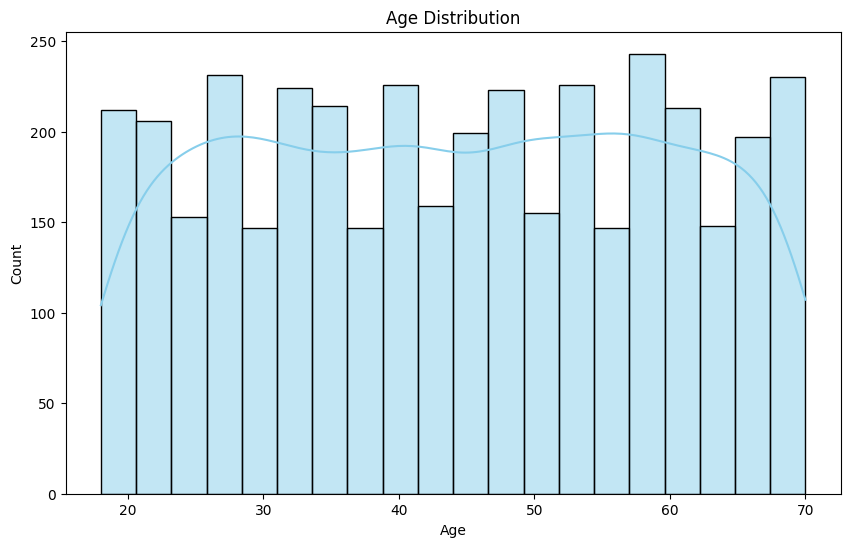

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Category Age

category_age
Middle-aged    38.717949
Senior         20.205128
Young Adult    18.666667
Adult          18.564103
Teen            3.846154
Name: proportion, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23892\1491548321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category_age', data=df, palette='pastel', order=df['category_age'].value_counts().index)


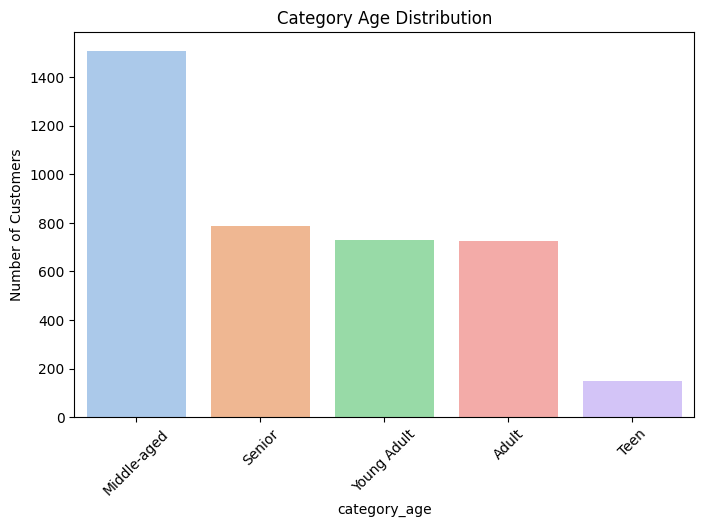

In [39]:
print(df['category_age'].value_counts(normalize=True) * 100)
plt.figure(figsize=(8, 5))
sns.countplot(x='category_age', data=df, palette='pastel', order=df['category_age'].value_counts().index)
plt.title('Category Age Distribution')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

#### Gender

gender
Male      68.0
Female    32.0
Name: proportion, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23892\2197082526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set2')


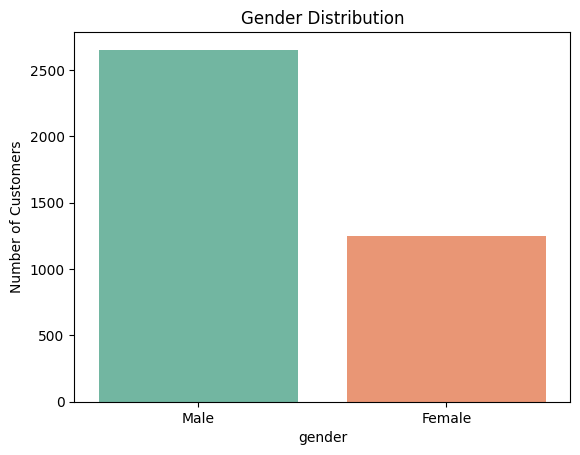

In [40]:
print(df['gender'].value_counts(normalize=True) * 100)

sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.ylabel('Number of Customers')
plt.show()

#### Location

location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
New York      87
Nevada        87
Nebraska      87
Delaware      86
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23892\2217207299.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')


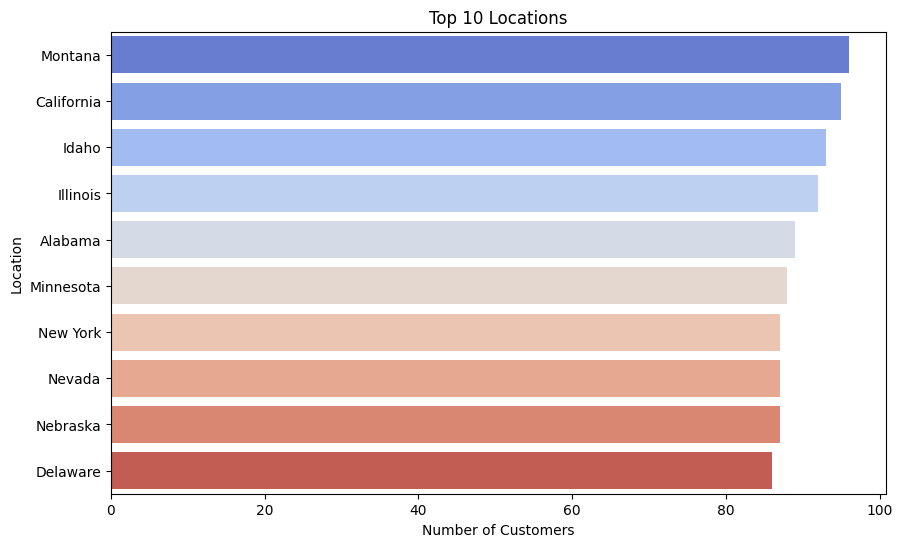

In [41]:
# Displaying the top 10 locations with the highest number of customers
print(df['location'].value_counts().head(10))
top_locations = df['location'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')
plt.title('Top 10 Locations')
plt.xlabel('Number of Customers')
plt.ylabel('Location')
plt.show()


## 📊 Insights

### 📌 1. Age Category:
- The **Middle-aged** group is the dominant customer base, representing **~39%**.
- **Young Adults** and **Adults** are evenly matched (**~18.6%** each).
- **Teens** are the least engaged segment (**~3.8%**).

### 📌 2. Gender:
- **Male customers dominate** the customer base at **68%**, while females make up **32%**.
- The product or marketing currently appeals more to men.

### 📌 3. Location:
- Top states by customer count include **Montana**, **California**, **Idaho**, and **Illinois**.
- The distribution is relatively balanced, but **top states are opportunities** for targeted campaigns.

---

## 💡 Recommendations

- **Focus marketing efforts** on *Middle-aged* customers with products and messaging that reflect their needs (*comfort, quality, value*).
- **Launch targeted campaigns for women** to balance gender participation — consider gender-specific offers or inclusive branding.
- **Prioritize top-performing states** in your promotional strategies and consider region-specific offers.
- **Investigate why Teens are underrepresented** — is it a product mismatch or lack of reach?


### 2- porduct Info

item_purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23892\508163401.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette="Blues_r")


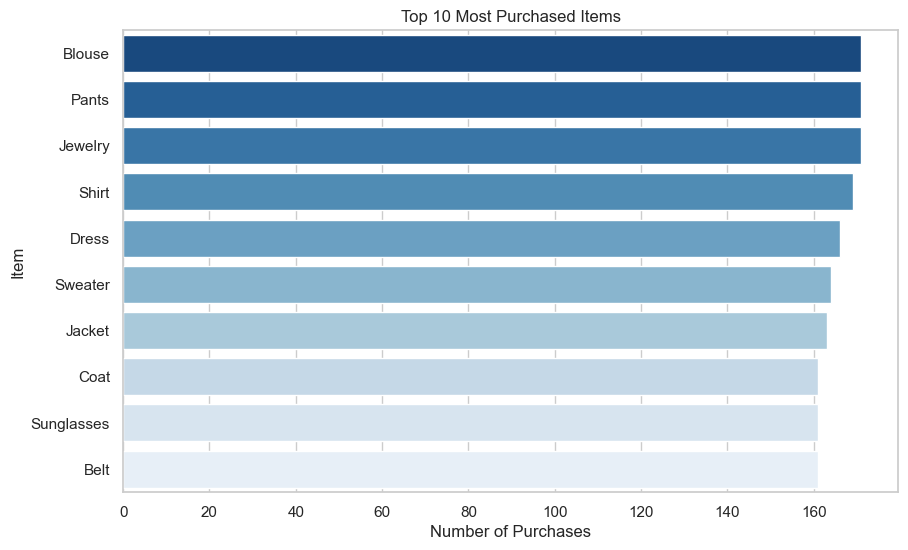

In [55]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
# --------------------------------------------
# 1. Top 10 most purchased items
# --------------------------------------------
# Count item purchases and get the top 10
top_items = df['item_purchased'].value_counts().head(10)
print(top_items)
# Plot the top purchased items
plt.figure()
sns.barplot(x=top_items.values, y=top_items.index, palette="Blues_r")
plt.title("Top 10 Most Purchased Items")
plt.xlabel("Number of Purchases")
plt.ylabel("Item")
plt.show()

category
Clothing       44.538462
Accessories    31.794872
Footwear       15.358974
Outerwear       8.307692
Name: proportion, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23892\1728775020.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="Set2")


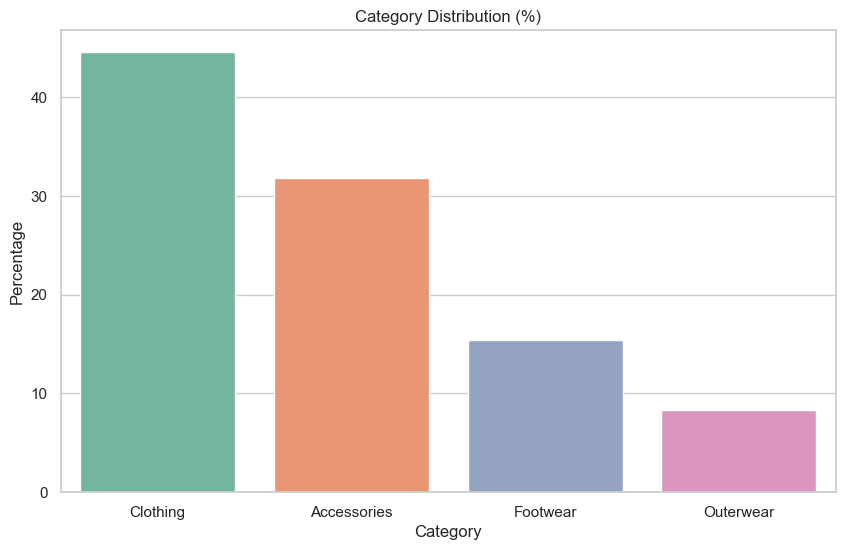

In [56]:
# --------------------------------------------
# 2. Category distribution
# --------------------------------------------
# Calculate the percentage distribution of categories
category_counts = df['category'].value_counts(normalize=True) * 100
print(category_counts)
# Plot category distribution
plt.figure()
sns.barplot(x=category_counts.index, y=category_counts.values, palette="Set2")
plt.title("Category Distribution (%)")
plt.ylabel("Percentage")
plt.xlabel("Category")
plt.show()

size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23892\2529171606.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_counts.index, y=size_counts.values, palette="muted")


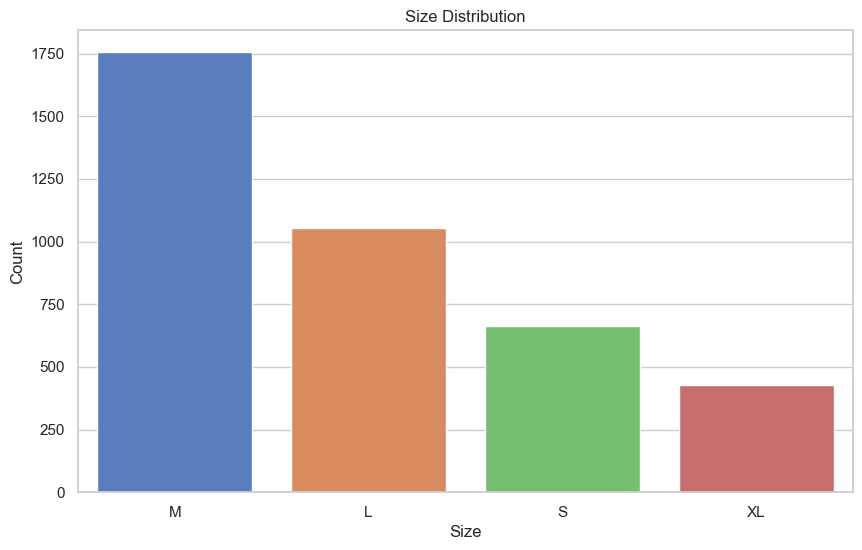

In [57]:
# --------------------------------------------
# 3. Size distribution
# --------------------------------------------
# Count frequency of each size
size_counts = df['size'].value_counts()
print(size_counts)
# Plot size distribution
plt.figure()
sns.barplot(x=size_counts.index, y=size_counts.values, palette="muted")
plt.title("Size Distribution")
plt.xlabel("Size")
plt.ylabel("Count")
plt.show()


color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Black     167
Cyan      166
Violet    166
Gray      159
Maroon    158
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23892\3675102764.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_colors.index, y=top_colors.values, palette="pastel")


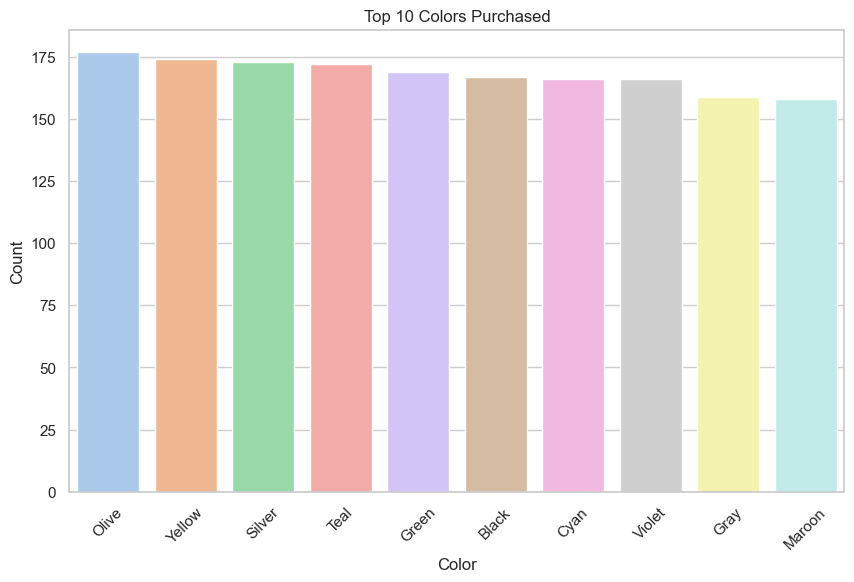

In [58]:
# --------------------------------------------
# 4. Color distribution (Top 10 colors)
# --------------------------------------------
# Count and get top 10 colors purchased
top_colors = df['color'].value_counts().head(10)
print(top_colors)
# Plot top colors
plt.figure()
sns.barplot(x=top_colors.index, y=top_colors.values, palette="pastel")
plt.title("Top 10 Colors Purchased")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23892\1606435592.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette="coolwarm")


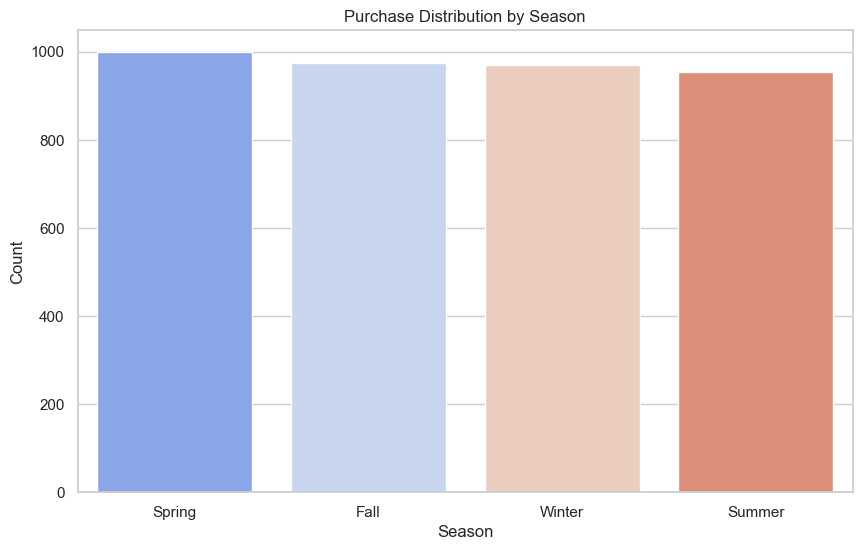

In [59]:
# --------------------------------------------
# 5. Seasonality of purchases
# --------------------------------------------
# Count purchases per season
season_counts = df['season'].value_counts()
print(season_counts)
# Plot seasonal distribution
plt.figure()
sns.barplot(x=season_counts.index, y=season_counts.values, palette="coolwarm")
plt.title("Purchase Distribution by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

##### 1- Which age category prefers which product category the most (by count and total spending)?

In [51]:
# Group by age category and product category to find total purchases and total spend per age group
age_category_preferences = df.groupby(['category_age', 'category']).agg({
    'item_purchased': 'count',
    'purchase_amount_usd': 'sum'
}).reset_index()

# Sort by age category and purchase count
age_category_preferences = age_category_preferences.sort_values(['category_age', 'item_purchased'], ascending=[True, False])

# Get top product category (by count) per age group with total spend
top_preferences = age_category_preferences.groupby('category_age').first().reset_index()
top_preferences


,category_age,category,item_purchased,purchase_amount_usd
0,Adult,Clothing,319,19145.0
1,Middle-aged,Clothing,668,39827.0
2,Senior,Clothing,346,21071.0
3,Teen,Clothing,69,4197.0
4,Young Adult,Clothing,335,20024.0


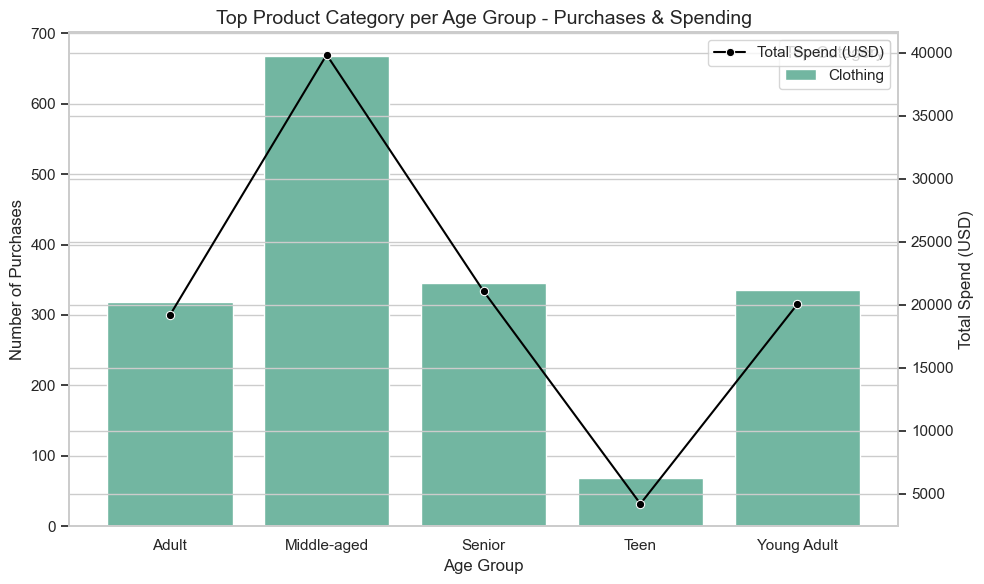

In [52]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot purchase count (left axis)
sns.barplot(
    data=top_preferences,
    x='category_age',
    y='item_purchased',
    hue='category',
    dodge=False,
    palette='Set2',
    ax=ax1
)
ax1.set_ylabel('Number of Purchases', fontsize=12)
ax1.set_xlabel('Age Group', fontsize=12)
ax1.set_title('Top Product Category per Age Group - Purchases & Spending', fontsize=14)
ax1.legend(title='Top Category', loc='upper right')

# Create a second y-axis for spending
ax2 = ax1.twinx()
sns.lineplot(
    data=top_preferences,
    x='category_age',
    y='purchase_amount_usd',
    color='black',
    marker='o',
    label='Total Spend (USD)',
    ax=ax2
)
ax2.set_ylabel('Total Spend (USD)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
# Group by gender and calculate total number of purchases and total spending
gender_spending = df.groupby('gender').agg({
    'item_purchased': 'count',
    'purchase_amount_usd': 'sum'
}).reset_index().rename(columns={
    'item_purchased': 'total_purchases',
    'purchase_amount_usd': 'total_spent_usd'
})

gender_spending


,gender,total_purchases,total_spent_usd
0,Female,1248,75191.0
1,Male,2652,157890.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23892\3919939145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_spending, x='gender', y='total_purchases', ax=ax[0], palette='Blues_d')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23892\3919939145.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_spending, x='gender', y='total_spent_usd', ax=ax[1], palette='Greens_d')


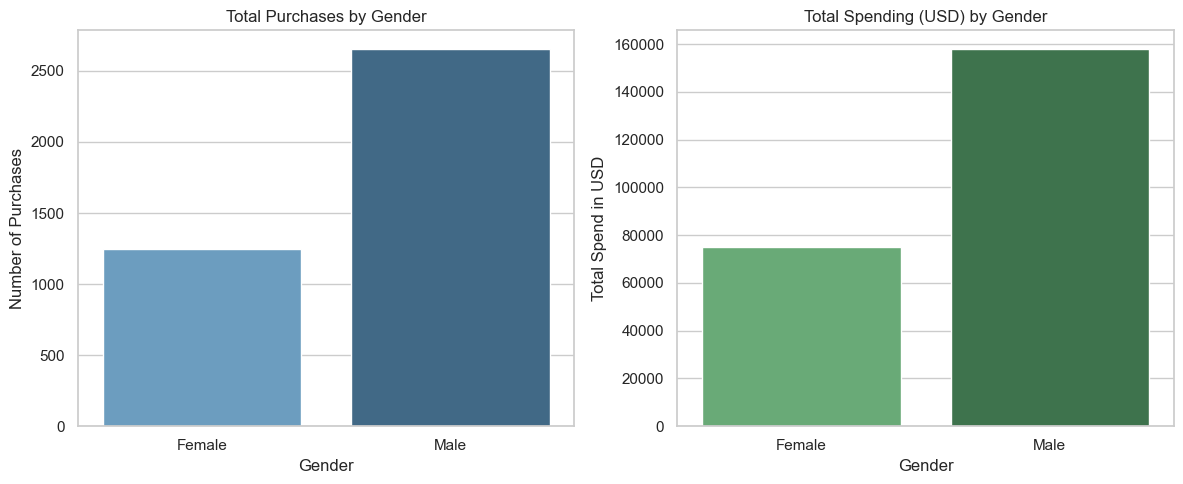

In [54]:
# Create subplots for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Barplot for total purchases
sns.barplot(data=gender_spending, x='gender', y='total_purchases', ax=ax[0], palette='Blues_d')
ax[0].set_title('Total Purchases by Gender')
ax[0].set_ylabel('Number of Purchases')
ax[0].set_xlabel('Gender')

# Barplot for total spending
sns.barplot(data=gender_spending, x='gender', y='total_spent_usd', ax=ax[1], palette='Greens_d')
ax[1].set_title('Total Spending (USD) by Gender')
ax[1].set_ylabel('Total Spend in USD')
ax[1].set_xlabel('Gender')

plt.tight_layout()
plt.show()

## 📊 Insights & Recommendations

### 🔍 Insights:
- **Most purchased items**: Blouse, Pants, Jewelry, Shirts.
- **Top category**: Clothing represents **44.5%** of total purchases.
- **Top spending age group**: Middle-aged customers are the highest spenders, spending **66% more** than others.
- **Gender insights**: Male customers spend **over twice** as much as female customers.
- **Popular colors**: Olive, Yellow, Silver are the top choices.
- **Preferred sizes**: **M** and **L** dominate size preferences.
- **Seasonal trends**: **Spring** and **Fall** are the peak seasons for shopping.

### ✅ Recommendations:
- 📈 Focus marketing on **middle-aged and senior** customers with high-end product lines.
- 🧔‍♂️ Target **male customers** with tailored campaigns and curated collections.
- 🎨 Promote products in **Olive**, **Yellow**, and **Silver** to match customer preferences.
- 📦 Increase stock for **M** and **L** sizes to meet demand.
- 🗓️ Launch **seasonal promotions** during **Spring** and **Fall** to maximize sales.


### 3-Purchase Behavior Analysis

  subscription_status  purchase_amount_usd
0                  No            59.865121
1                 Yes            59.491928


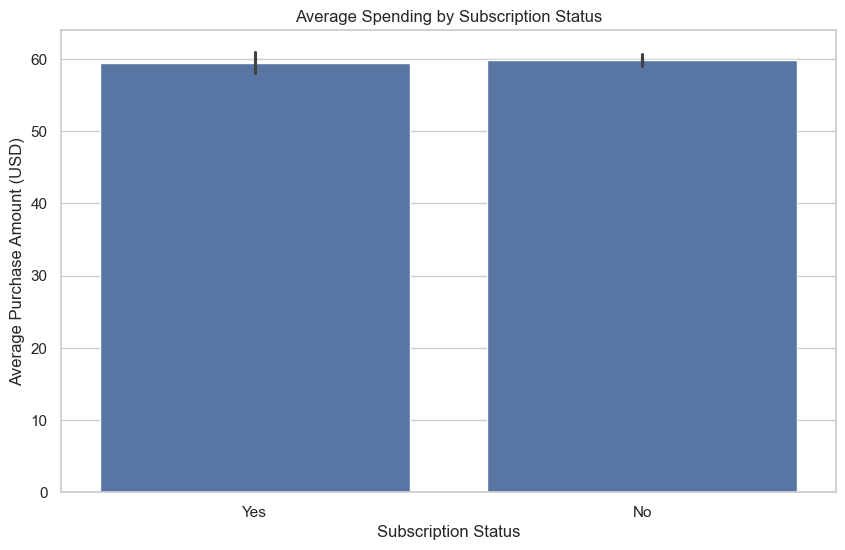

In [67]:
 # 1. Do Subscribed Customers Spend More?

# 💬 Subscription Status vs Average Spending
print(df.groupby('subscription_status')['purchase_amount_usd'].mean().reset_index())

sns.barplot(data=df, x='subscription_status', y='purchase_amount_usd', estimator='mean')
plt.title('Average Spending by Subscription Status')
plt.ylabel('Average Purchase Amount (USD)')
plt.xlabel('Subscription Status')
plt.show()

  preferred_payment_method  purchase_amount_usd  transaction_count
0            Bank Transfer            59.712418                612
1                     Cash            59.704478                670
2              Credit Card            60.074516                671
3               Debit Card            60.915094                636
4                   PayPal            59.245199                677
5                    Venmo            58.949527                634


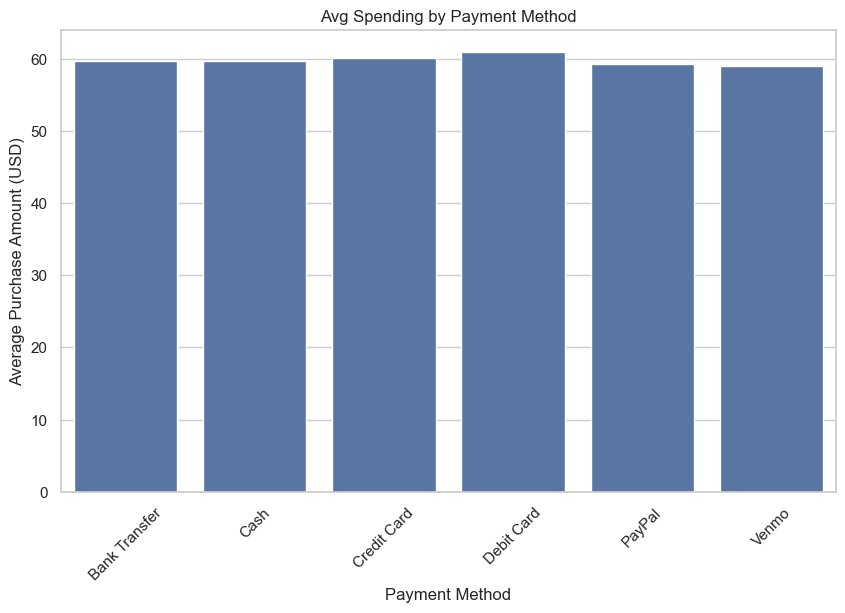

In [62]:
 # 2. Most Used Payment Methods + Avg Spending

payment_df = df.groupby('preferred_payment_method').agg({
    'purchase_amount_usd': 'mean',
    'preferred_payment_method': 'count'
}).rename(columns={'preferred_payment_method': 'transaction_count'}).reset_index()
print(payment_df)
sns.barplot(data=payment_df, x='preferred_payment_method', y='purchase_amount_usd')
plt.title('Avg Spending by Payment Method')
plt.ylabel('Average Purchase Amount (USD)')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.show()


   promo_code_used  purchase_amount_usd
0            False            60.130454
1             True            59.279070


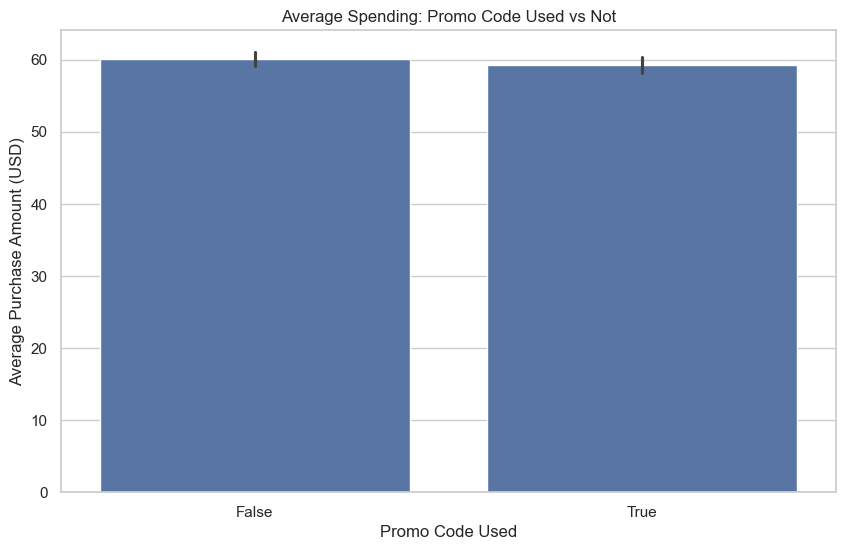

In [68]:
 # 3. Does Using a Promo Code Affect Spending?
print(df.groupby('promo_code_used')['purchase_amount_usd'].mean().reset_index())    
sns.barplot(data=df, x='promo_code_used', y='purchase_amount_usd', estimator='mean')
plt.title('Average Spending: Promo Code Used vs Not')
plt.ylabel('Average Purchase Amount (USD)')
plt.xlabel('Promo Code Used')
plt.show()


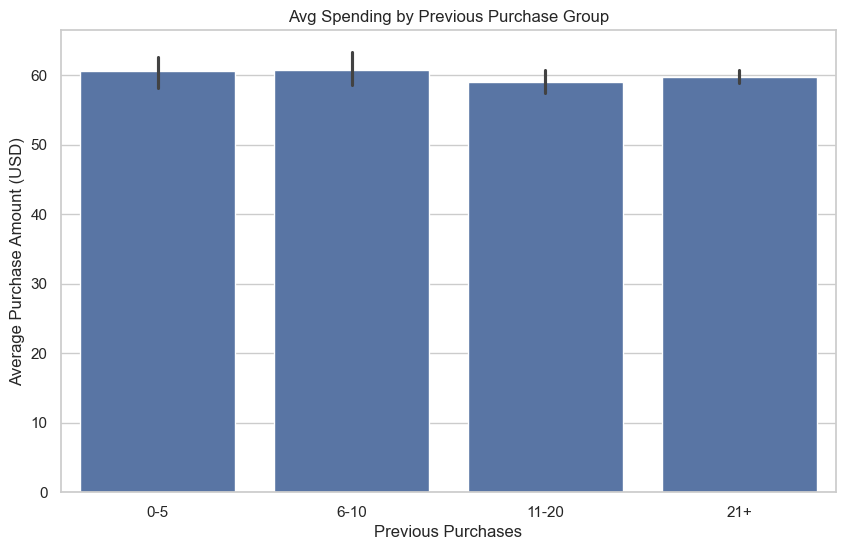

In [70]:
# 4. How Previous Purchases Affect Spending

bins = [0, 5, 10, 20, df['previous_purchases'].max()]
labels = ['0-5', '6-10', '11-20', '21+']
df['purchase_group'] = pd.cut(df['previous_purchases'], bins=bins, labels=labels)

sns.barplot(data=df, x='purchase_group', y='purchase_amount_usd', estimator='mean')
plt.title('Avg Spending by Previous Purchase Group')
plt.xlabel('Previous Purchases')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


   discount_applied  purchase_amount_usd
0             False            60.130454
1              True            59.279070


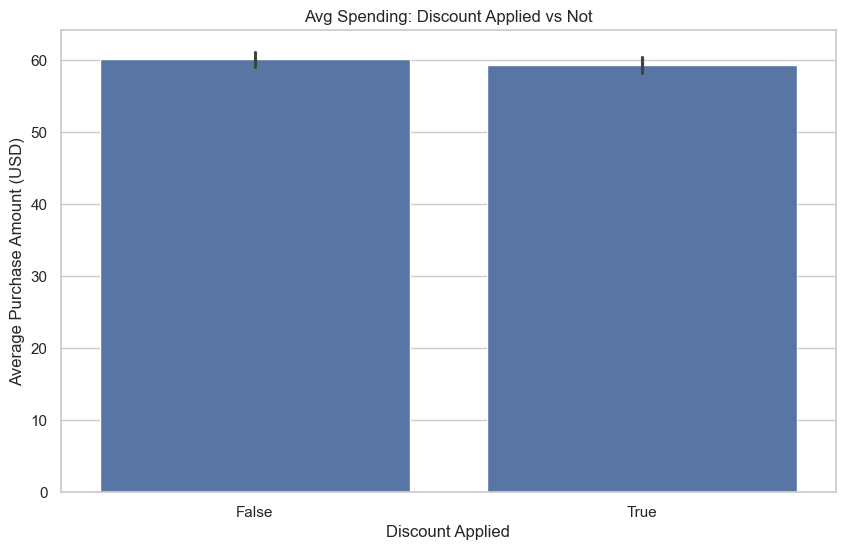

In [71]:
# 5. Does Discount Increase Spending?
print(df.groupby('discount_applied')['purchase_amount_usd'].mean().reset_index())
sns.barplot(data=df, x='discount_applied', y='purchase_amount_usd', estimator='mean')
plt.title('Avg Spending: Discount Applied vs Not')
plt.ylabel('Average Purchase Amount (USD)')
plt.xlabel('Discount Applied')
plt.show()



# 📊 Customer Purchase Behavior – Insights & Recommendations

## 🔍 Insights

### 🏷️ Promotions & Discounts
- Customers **not using promo codes or discounts** spend more (**$60.13**) than those who do (**$59.27**).

### 💳 Payment Methods
- **Debit Card** users have the highest average purchase (**$60.91**).
- **Venmo** users spend the least (**$58.95**).
- Most used payment methods: **PayPal**, **Credit Card**, and **Cash**.

### 📬 Subscription
- **Non-subscribers** spend more (**$59.87**) than **subscribers** (**$59.49**).

---

## ✅ Recommendations

- **Limit excessive discounting** to maintain average purchase value.
- **Encourage Debit Card usage** to boost transaction value.
- **Support popular payment methods** like PayPal and Credit Card for convenience.
- **Reassess subscription benefits** to ensure they provide real value to customers.

---

## 📝 Summary

- Avoid unnecessary discounts.  
- Promote Debit Card payments.  
- Prioritize the most used payment methods.  
- Reevaluate the subscription offering.



### 4- Section 4 & 5: Purchase Behavior + Customer Feedback

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23892\286780243.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_stats.values, y=payment_stats.index, palette='Blues_r')


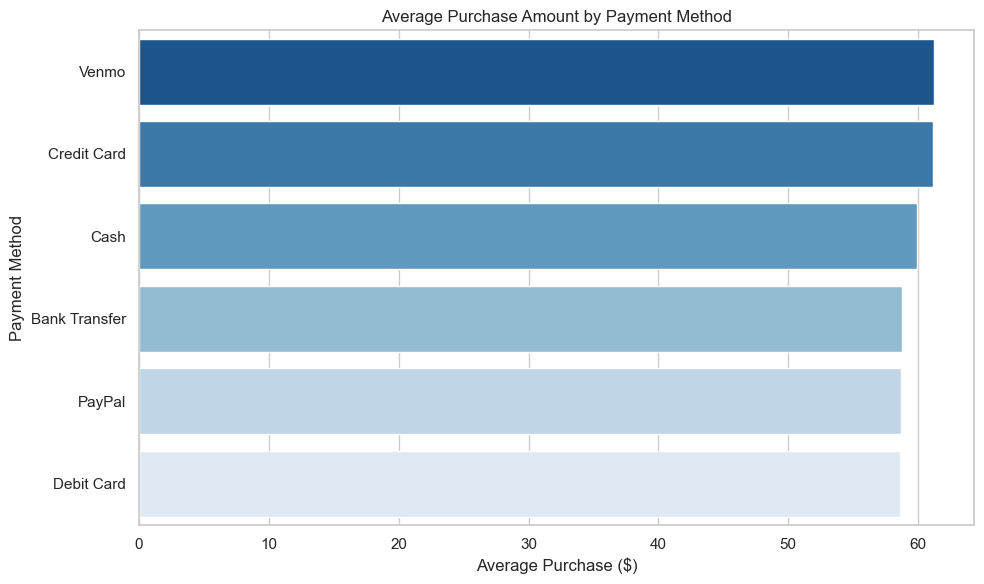

In [72]:
# 1. What is the average purchase amount per payment method?
# Group and sort
payment_stats = df.groupby("payment_method")["purchase_amount_usd"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=payment_stats.values, y=payment_stats.index, palette='Blues_r')
plt.title("Average Purchase Amount by Payment Method")
plt.xlabel("Average Purchase ($)")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23892\3488869317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_stats.index, y=shipping_stats.values, palette="Greens")


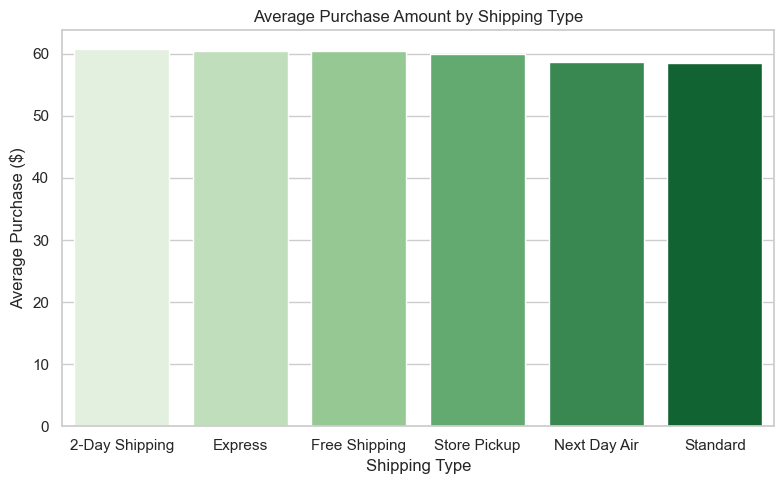

In [73]:
# 2. How does shipping type affect purchase amount?
shipping_stats = df.groupby("shipping_type")["purchase_amount_usd"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=shipping_stats.index, y=shipping_stats.values, palette="Greens")
plt.title("Average Purchase Amount by Shipping Type")
plt.ylabel("Average Purchase ($)")
plt.xlabel("Shipping Type")
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23892\3455368007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="review_rating", y="purchase_amount_usd", data=df, palette="coolwarm")


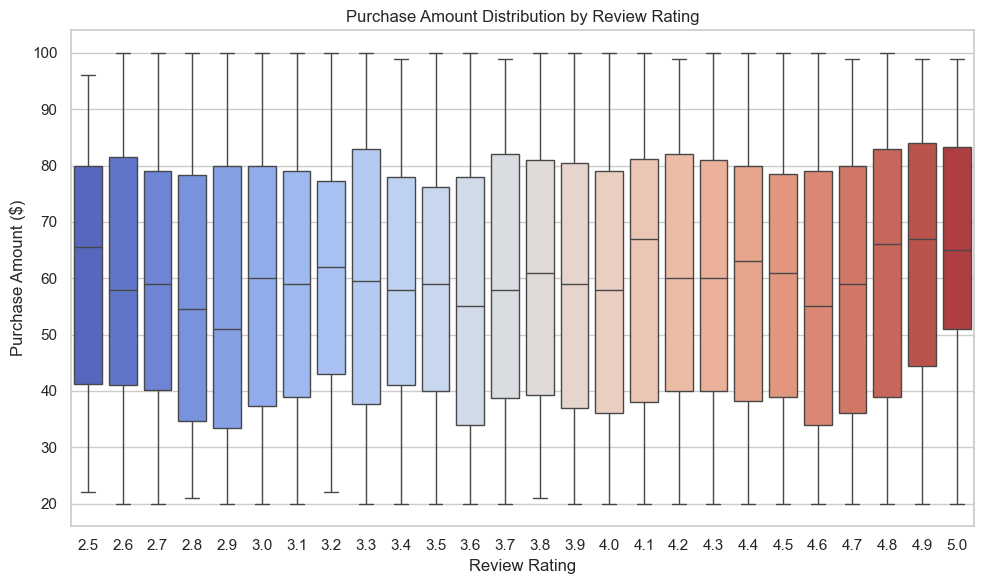

In [74]:
# 3. Does review rating correlate with purchase amount?
plt.figure(figsize=(10,6))
sns.boxplot(x="review_rating", y="purchase_amount_usd", data=df, palette="coolwarm")
plt.title("Purchase Amount Distribution by Review Rating")
plt.xlabel("Review Rating")
plt.ylabel("Purchase Amount ($)")
plt.tight_layout()
plt.show()
